##Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [5]:
smarket_df = pd.read_csv('data/Smarket.csv')

In [3]:
smarket_df.head()
#市场数据，来自标准普尔的500支股票，
#每天记录了与前五个交易日的投资回报比例、交易量、今日投资回报比例

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


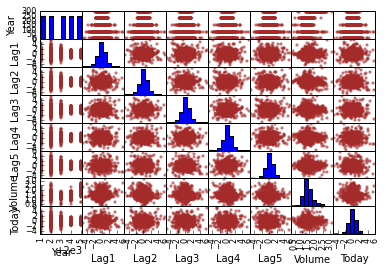

In [12]:
axes = pd.tools.plotting.scatter_matrix(smarket_df,color="brown")

In [3]:
import statsmodels.api as sm

In [36]:
X = smarket_df[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']].values
X = sm.add_constant(X)

In [37]:
y = pd.factorize(smarket_df['Direction'])[0]#对y进行编码

In [33]:
help(pd.factorize)

Help on function factorize in module pandas.core.algorithms:

factorize(values, sort=False, order=None, na_sentinel=-1, size_hint=None)
    Encode input values as an enumerated type or categorical variable
    
    Parameters
    ----------
    values : ndarray (1-d)
        Sequence
    sort : boolean, default False
        Sort by values
    order : deprecated
    na_sentinel : int, default -1
        Value to mark "not found"
    size_hint : hint to the hashtable sizer
    
    Returns
    -------
    labels : the indexer to the original array
    uniques : ndarray (1-d) or Index
        the unique values. Index is returned when passed values is Index or Series
    
    note: an array of Periods will ignore sort as it returns an always sorted PeriodIndex



In [41]:
#逻辑回归，利用了statsmodels.api.Logit模块，最大似然估计拟合数据
lgt = sm.Logit(y,X).fit()
lgt.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Tue, 14 Jul 2015   Pseudo R-squ.:                0.002074
Time:                        21:20:59   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1260      0.241      0.523      0.601        -0.346     0.598
x1             0.0731      0.050      1.457      0.145        -0.025     0.171
x2             0.0423      0.050      0.845      0.398        -0.056     0.140
x3            -0.0111      0.050     -0.222      0.824        -0.109     0.087
x4            -0.0094      0.050     -0.187      0.851        -0.107     0.089
x5            -0.0103      0.050     -0.208      0.835        -0.107     0.087
x6            -0.1354      0.158     -0.855      0.392        -0.446     0.175
==============================================================================
"""

In [45]:
p=lgt.predict(X) #预测

In [48]:
ypreds = ["Up" if prob > 0.5 else "Down" for prob in p]
ypreds[0:5]
yact = [str(i) for i in smarket_df['Direction'].values]

In [52]:
accuracy_score(yact,ypreds)

0.47839999999999999

In [58]:
#修改特征，去除P值过大的特征
X1 = smarket_df[['Lag1','Lag2','Volume']].values
X1 = sm.add_constant(X1)
lgt2 = sm.Logit(y,X1).fit()
lgt2.summary()

Optimization terminated successfully.
         Current function value: 0.691082
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1246
Method:                           MLE   Df Model:                            3
Date:                Tue, 14 Jul 2015   Pseudo R-squ.:                0.002004
Time:                        21:31:02   Log-Likelihood:                -863.85
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.3248
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.1206      0.240      0.502      0.616        -0.350     0.591
x1             0.0733      0.050      1.460      0.144        -0.025     0.172
x2             0.0428      0.050      0.855      0.393        -0.055     0.141
x3            -0.1318      0.158     -0.835      0.404        -0.441     0.178
==============================================================================
"""

In [69]:
p2=lgt2.predict(X1) #预测
ypreds2 = ["Up" if prob > 0.5 else "Down" for prob in p2]

In [70]:
accuracy_score(yact,ypreds2)

0.46879999999999999

In [72]:
#利用sklearn进行预测，与statsmodel的实现算法有差别
X3 = smarket_df[smarket_df.columns[1:-2]]
clf = LogisticRegression()

In [76]:
clf.fit(X3,y)
clf.intercept_,clf.coef_

(array([ 0.11454962]),
 array([[ 0.07279035,  0.04229102, -0.010958  , -0.00921799, -0.01023031,
         -0.12793931]]))

In [78]:
probs3 = clf.predict_proba(X3)
ypreds3 = ["Up" if prob[0] > 0.5 else "Down" for prob in probs3]
accuracy_score(yact,ypreds3)

0.52480000000000004

##Make Training and Test Set

In [6]:
#划分训练集合测试集
train_df =smarket_df[smarket_df['Year'] < 2005]
test_df = smarket_df[smarket_df['Year'] >= 2005]

In [26]:
clf2 = LogisticRegression()
Xtrain = train_df[smarket_df.columns[1:-2]]
ytrain = pd.factorize(train_df['Direction'])[0]
clf2.fit(Xtrain,ytranin)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [17]:
Xtest = test_df[smarket_df.columns[1:-2]]
ytest = pd.factorize(test_df['Direction'])[0]
ypred = clf2.predict(Xtest)

In [34]:
from sklearn.metrics import confusion_matrix
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics.classification:

confusion_matrix(y_true, y_pred, labels=None)
    Compute confusion matrix to evaluate the accuracy of a classification
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.
    
    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_classes], optional
        List of labels to index the matrix. This may be used to reorder
        or select a subset of labels.
        If none is given, those that appear at least once
        in ``y_true`` or ``y_pred`` are used in sorted order.
    
    Returns
    -------
    C : array, shape = [n_classes, n_classes]
        Confusion matr

In [22]:
confusion_matrix(ytest,ypred)

array([[40, 71],
       [52, 89]])

In [23]:
accuracy_score(ytest,ypred)

0.51190476190476186

##Linear Discrimant Analysis

In [24]:
from sklearn.lda import LDA

In [27]:
clf3 = LDA()
clf3.fit(Xtrain,ytrain)
ypred = clf3.predict(Xtest)

In [28]:
confusion_matrix(ytest,ypred)

array([[34, 77],
       [44, 97]])

In [29]:
accuracy_score(ytest,ypred)

0.51984126984126988

In [44]:
yprob=clf3.predict_proba(Xtest)
#返回每个类的概率

##Quadratic Discriminant Analysis

In [29]:
X = smarket_df[['Lag1','Lag2']]
y = smarket_df['Direction']
ytrain = pd.factorize(y)[0]

In [19]:
from sklearn.qda import  QDA

In [31]:
clf4 = QDA()

In [36]:
clf4.fit(X,ytrain)
ypred = clf4.predict(X)
confusion_matrix(ytrain,ypred)

array([[554,  94],
       [493, 109]])

In [37]:
accuracy_score(ytrain,ypred)

0.53039999999999998

In [38]:
clf4.means_

array([[-0.03969136, -0.02244444],
       [ 0.05068605,  0.03229734]])

##KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
clf5 = KNeighborsClassifier()
clf5.fit(X,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [46]:
ypred = clf5.predict(X)

In [47]:
accuracy_score(ytrain,ypred)

0.68640000000000001